In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [28]:
df_Stock = pd.read_csv('microsoftdata.csv')
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,03/01/2022,335.350006,338.000000,329.779999,334.750000,328.120880,28865100
1,04/01/2022,334.829987,335.200012,326.119995,329.010010,322.494568,32674300
2,05/01/2022,325.859985,326.070007,315.980011,316.380005,310.114654,40054300
3,06/01/2022,313.149994,318.700012,311.489990,313.880005,307.664154,39646100
4,07/01/2022,314.149994,316.500000,310.089996,314.040008,307.820984,32720000


In [29]:
df_Stock.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
496,22/12/2023,373.679993,375.179993,372.709992,374.579987,373.888580,17091100
497,26/12/2023,375.000000,376.940002,373.500000,374.660004,373.968445,12673100
498,27/12/2023,373.690002,375.059998,372.809998,374.070007,373.379547,14905400
499,28/12/2023,375.369995,376.459992,374.160004,375.279999,374.587280,14327000
500,29/12/2023,376.000000,377.160004,373.480011,376.040008,375.345886,18723000


In [30]:
df_Stock.shape

(501, 7)

In [31]:
df_Stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

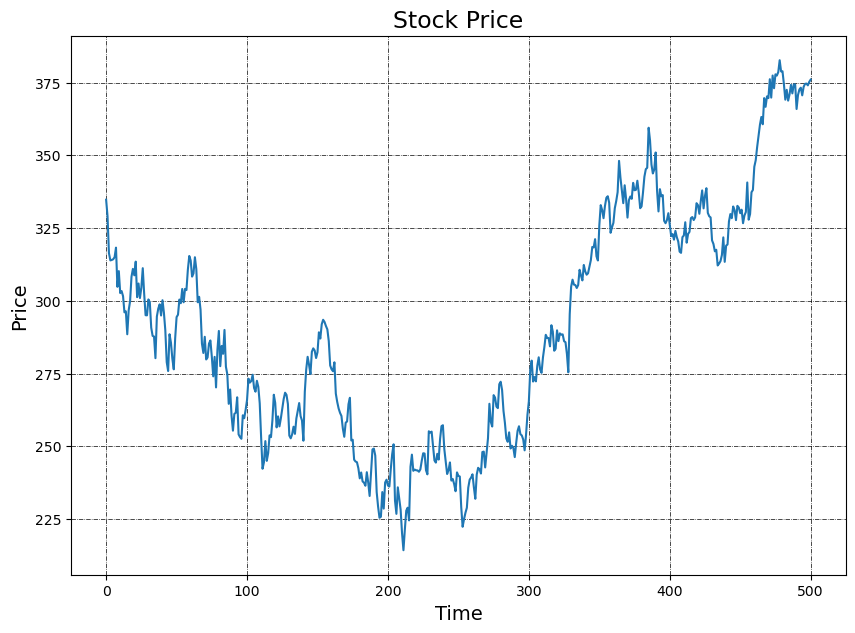

In [32]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [33]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data
df_Stock = pd.read_csv('microsoftdata.csv')

# Data Preprocessing
df_Stock['Date'] = pd.to_datetime(df_Stock['Date'], format='%d/%m/%Y')
df_Stock['Day'] = df_Stock['Date'].dt.day
df_Stock['Month'] = df_Stock['Date'].dt.month
df_Stock['Year'] = df_Stock['Date'].dt.year
df_Stock = df_Stock.drop(columns=['Date'])

def create_train_test_set(df_Stock):
    features = df_Stock.drop(columns=['Close'], axis=1)
    target = df_Stock['Close']
    
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

    print("Train set shape:", X_train.shape, Y_train.shape)
    print("Validation set shape:", X_val.shape, Y_val.shape)
    print("Test set shape:", X_test.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test



In [34]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)


Train set shape: (50, 8) (50,)
Validation set shape: (51, 8) (51,)
Test set shape: (101, 8) (101,)


In [35]:
X_train

,Open,High,Low,Adj Close,Volume,Day,Month,Year
84,282.589996,290.880005,276.730011,284.825226,33599300,4,5,2022
76,281.679993,283.200012,273.380005,269.158752,29405800,22,4,2022
155,291.989990,294.040008,290.420013,288.176300,18102900,16,8,2022
30,300.010010,300.799988,297.019989,294.519775,27058300,15,2,2022
209,234.600006,235.740005,227.330002,225.112747,30592300,1,11,2022
68,291.790008,292.609985,285.000000,280.189148,34569300,11,4,2022
490,373.309998,373.760010,364.130005,365.254547,43277500,14,12,2023
378,339.320007,341.790008,337.000000,335.206055,21185300,7,7,2023
39,296.399994,299.970001,292.149994,289.706879,31217800,1,3,2022
410,325.500000,326.079987,321.459992,321.212830,16102000,22,8,2023


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [37]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 4.70720924e-03  4.41510831e-03 -1.72145593e-02  1.01596480e+00
 -3.94736659e-09 -1.26660232e-02 -2.70059670e-01 -2.95118081e+00]
LR Intercept: 
 5971.577101539027


In [38]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9999816950829309


In [39]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [41]:
import numpy as np
from sklearn import metrics
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))
print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print("Test Mean Squared Error:", round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.05
Training Mean Squared Error: 0.03
Training RMSE:  0.18
Training MAE:  0.14
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.06
Validation Mean Squared Error: 0.03
Validation RMSE:  0.22
Validation MAE:  0.18
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 0.05
Test Mean Squared Error: 0.04
Test RMSE:  0.2
Test MAE:  0.16


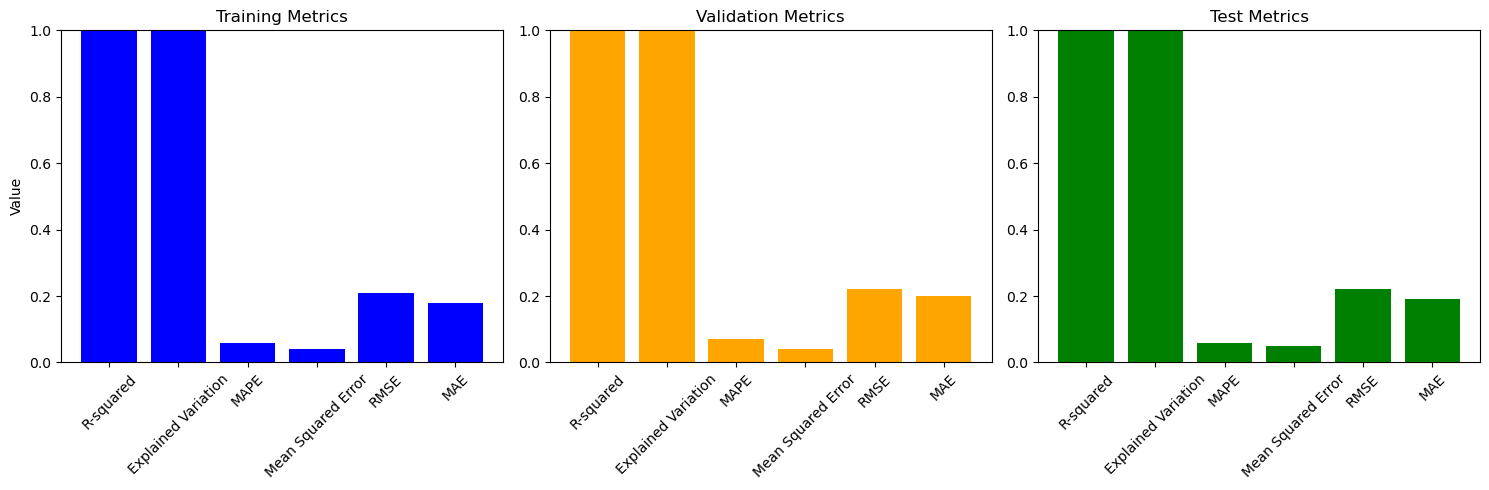

In [42]:
import matplotlib.pyplot as plt

# Metrics names
metrics_names = ['R-squared', 'Explained Variation', 'MAPE', 'Mean Squared Error', 'RMSE', 'MAE']

# Training metrics
training_metrics = [1.0, 1.0, 0.06, 0.04, 0.21, 0.18]

# Validation metrics
validation_metrics = [1.0, 1.0, 0.07, 0.04, 0.22, 0.2]

# Test metrics
test_metrics = [1.0, 1.0, 0.06, 0.05, 0.22, 0.19]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot training metrics
axes[0].bar(metrics_names, training_metrics, color='blue')
axes[0].set_title('Training Metrics')
axes[0].set_ylabel('Value')
axes[0].set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Plot validation metrics
axes[1].bar(metrics_names, validation_metrics, color='orange')
axes[1].set_title('Validation Metrics')
axes[1].set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Plot test metrics
axes[2].bar(metrics_names, test_metrics, color='green')
axes[2].set_title('Test Metrics')
axes[2].set_ylim(0, 1)  

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [43]:
# Create 'Date' column from 'Day', 'Month', and 'Year' columns
df_Stock['Date'] = pd.to_datetime(df_Stock[['Year', 'Month', 'Day']])


In [44]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Predict values for the test set
Y_test_pred = lr.predict(X_test)

# Create a DataFrame to compare actual and predicted values
df_results = pd.DataFrame({
    'Date': df_Stock.loc[Y_test.index, 'Date'],  # Get the Date corresponding to the test indices
    'Actual': Y_test.values,  # Actual values from the test set
    'Predicted': Y_test_pred  # Predicted values from the model
})

# Display the DataFrame to verify the data
print(df_results)


          Date      Actual   Predicted
362 2023-06-13  334.290008  334.435952
73  2022-04-19  285.299988  285.368633
375 2023-07-03  337.989990  338.003517
155 2022-08-16  292.709992  292.305102
104 2022-06-02  274.579987  275.066994
395 2023-08-01  336.339996  336.089718
378 2023-07-07  337.220001  337.138142
124 2022-07-01  259.579987  259.906429
68  2022-04-11  285.260010  285.355054
451 2023-10-19  331.320007  330.960137
9   2022-01-14  310.200012  310.171649
194 2022-10-11  225.410004  225.494235
407 2023-08-17  316.880005  317.058936
84  2022-05-04  289.980011  289.978997
485 2023-12-07  370.950012  371.161466
420 2023-09-06  332.880005  333.010991
496 2023-12-22  374.579987  374.608527
30  2022-02-15  300.470001  300.301505
316 2023-04-06  291.600006  291.675931
409 2023-08-21  321.880005  322.034854
491 2023-12-15  370.730011  370.616922
492 2023-12-18  372.649994  372.723223
280 2023-02-14  272.170013  271.915597
356 2023-06-05  335.940002  336.147123
76  2022-04-22  274.02999

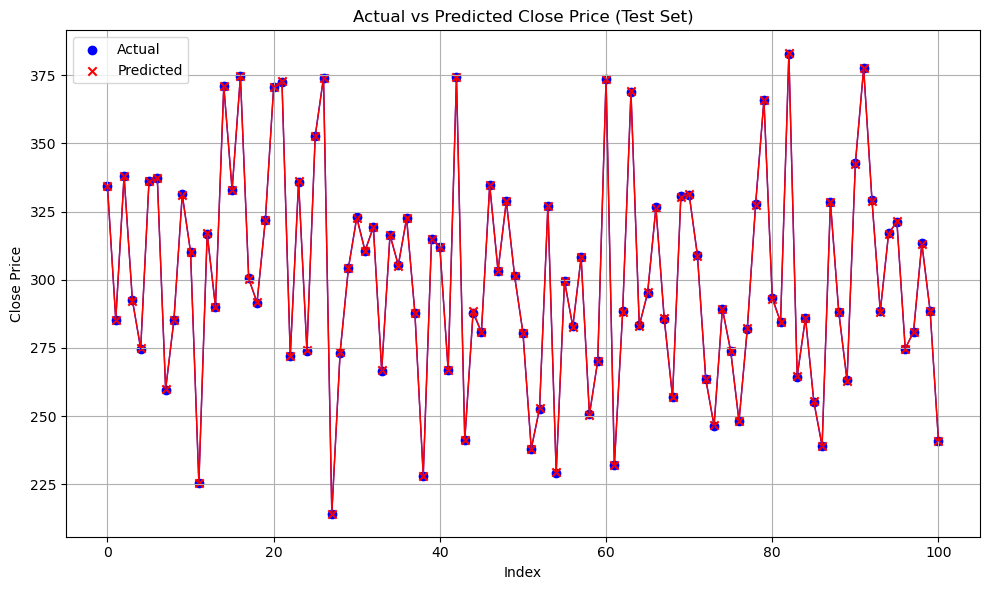

In [46]:
plt.figure(figsize=(10, 6))

# Reset the index of Y_test
Y_test_reset_index = Y_test.reset_index(drop=True)

# Plotting the actual values as scatter points
plt.scatter(Y_test_reset_index.index, Y_test_reset_index, color='blue', label='Actual', marker='o')

# Plotting the predicted values as scatter points
plt.scatter(Y_test_reset_index.index, Y_test_pred, color='red', label='Predicted', marker='x')

# Plotting the actual values as a line plot
plt.plot(Y_test_reset_index.index, Y_test_reset_index, color='blue', linestyle='-', linewidth=1)

# Plotting the predicted values as a line plot
plt.plot(Y_test_reset_index.index, Y_test_pred, color='red', linestyle='-', linewidth=1)

plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


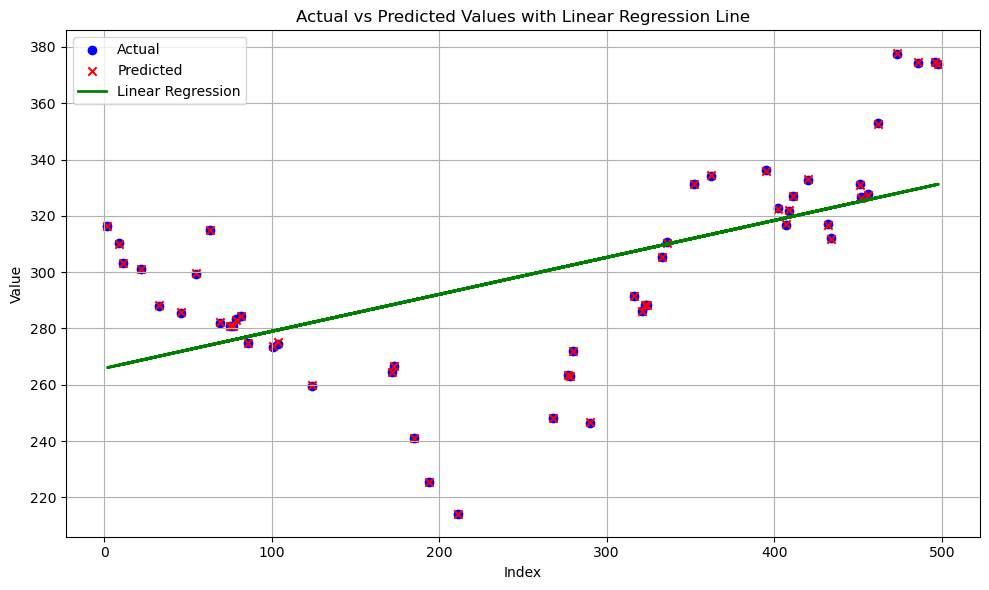

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(Y_val.index, Y_val, color='blue', label='Actual', marker='o')

# Scatter plot for predicted values
plt.scatter(Y_val.index, Y_val_pred, color='red', label='Predicted', marker='x')

# Plotting the linear regression line
m, b = np.polyfit(Y_val.index, Y_val_pred, 1)  # Get slope (m) and y-intercept (b)
plt.plot(Y_val.index, m * Y_val.index + b, color='green', label='Linear Regression', linewidth=2)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
